# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Loop cities dataframe, pulling API data for each iteration
cities = pd.DataFrame(cities)
weatherResults = []
url = "http://api.openweathermap.org/data/2.5/weather"

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities.iterrows(): 
    params = {
        "q": city[1][0],
        "appid": weather_api_key,
        "units": 'imperial',
    }
    
    print(f"Processing Record {city[0]} of Set 1 | {city[1][0]}")
    results = requests.get(url, params=params).json()
    print(results)
    weatherResults.append(results)
    time.sleep(.5)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

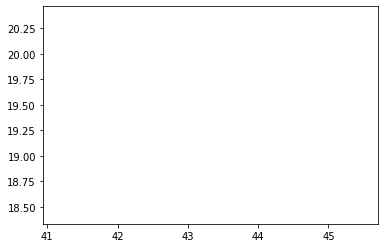

In [306]:
weatherResultsDF = pd.DataFrame(weatherResults)
weatherResultsDF.to_csv('C:/temp/weatherData.csv')
weatherResultsDF.dropna(how='any')

# weatherResultsDF.head()





### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [310]:
i = 0
for index,weatherResult in weatherResultsDF.iterrows(): 
    yAxis = str(weatherResult['coord']['lat'])
    xAxis = weatherResult['main']['temp']
    # y=weatherResultsDF[:1]['coord'][:0]['lat'])
    plt.plot(xAxis, yAxis, marker="o", alpha=0.75)
    # i = i + 1

# plt.show()


TypeError: 'float' object is not subscriptable

In [ ]:
weatherResultsDF.coord.array[0].lat

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression